In [1]:
import matplotlib.pyplot as plt
import numpy as np

from snn_dpe.tools.data import normalize_iris_data, read_iris_data
from snn_dpe.tools.network import (create_encoders, create_network,
                                   save_trained_network)
from snn_dpe.tools.plotting import plot_acc
from snn_dpe.tools.train.classification import train_all, predict


iris_data_location = '../../Datasets/Iris/iris.data'

In [3]:
#  create network and encoders
n_neurons = 32
n_synapses = int(n_neurons * np.random.uniform(low=2, high=3)) # random number from n_neurons * 2 to n_neurons * 3

_, _, classes, attributes = read_iris_data(iris_data_location, shuffle=False)

rate_encoders = create_encoders(len(attributes)*2, enc_type='frequency')

min_f = 100
max_f = 180
sim_f = 1000
period_encoders = create_encoders(len(attributes)*2, min_f, max_f, sim_f, enc_type='period')

# neurons = create_network(n_neurons, n_synapses)
neurons = create_network(n_neurons, n_synapses, threshold_range=(0.1, 0.4), leak_range=(0.01, 0.15), weight_range=(0,1.8))


In [4]:

iris_data, labels, classes, attributes = read_iris_data(iris_data_location, shuffle=True)

normalized_iris_data = normalize_iris_data(iris_data, attributes)


Training with rate encoding


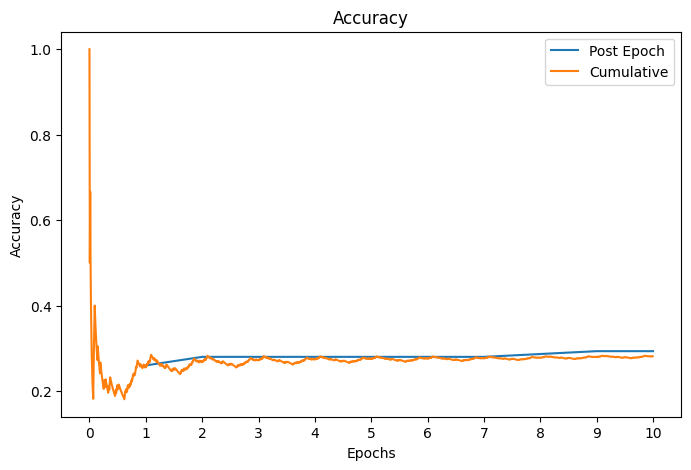

Training with period encoding


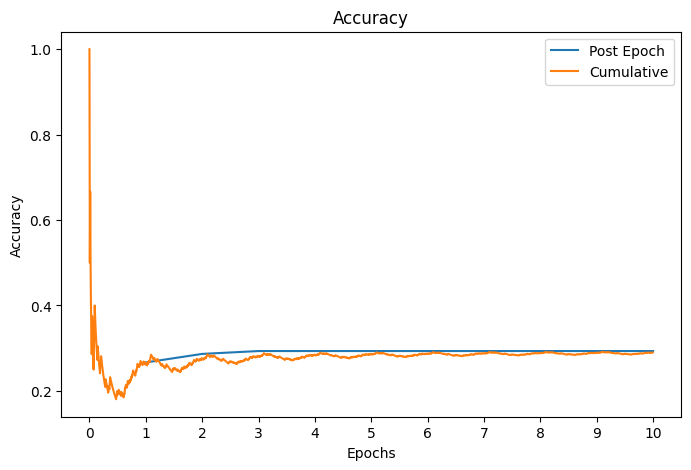

average steady state t RATE = 23.333333333333325
average steady state t PERIOD = 27.913333333333348


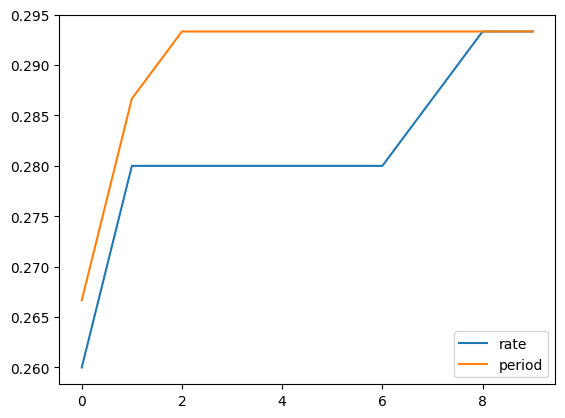

In [5]:

# create dpe weights
rate_dpe_weights = np.random.rand(n_neurons, len(classes))
period_dpe_weights = rate_dpe_weights.copy()

iris_data, labels, classes, attributes = read_iris_data(iris_data_location, shuffle=True)

normalized_iris_data = normalize_iris_data(iris_data, attributes)

normalized_iris_data = np.append(normalized_iris_data, (1-normalized_iris_data), axis=1)

n_epochs = 10
window_size = 10
sim_time = 200

print('Training with rate encoding')
rate_E_t, rate_avg_ss, rate_c_acc = train_all(normalized_iris_data, labels, classes, neurons, rate_encoders, rate_dpe_weights, sim_time=sim_time, window_size=window_size, n_epochs=n_epochs)
plot_acc(rate_E_t, rate_c_acc)

print('Training with period encoding')
period_E_t, period_avg_ss, period_c_acc = train_all(normalized_iris_data, labels, classes, neurons, period_encoders, period_dpe_weights, sim_time=sim_time, window_size=window_size, n_epochs=n_epochs)
plot_acc(period_E_t, period_c_acc)

plt.plot(range(n_epochs), rate_E_t, label='rate')
plt.plot(range(n_epochs), period_E_t, label='period')
plt.legend()
print(f'average steady state t RATE = {rate_avg_ss}')
print(f'average steady state t PERIOD = {period_avg_ss}')



In [6]:

n_correct = 0
for d, l in zip(normalized_iris_data, labels):
    p = predict(neurons, period_encoders, period_dpe_weights, d)

    if np.argmax(p) == l:
        n_correct += 1

print(n_correct)

50


In [7]:
# save_trained_network('16n_77.json', neurons, rate_encoders, rate_dpe_weights, window_size, sim_time, c_acc, rate_E_t, avg_ss)